In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations. (zip() pairs them up to make full set of coordinates)

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
        
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
    

621

In [5]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city, in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.

    if (i % 50 == 0 and i >= 50): #this is just to make it pause every 60 secs to split up API calls and create "sets" of 50

        set_count += 1

        record_count = 1

        time.sleep(60)

    # Create endpoint URL with each city.

    city_url = url + "&q=" + city.replace(" ","+") #replacing spaces in the city names with +


    # Log the URL, record, and set numbers and the city.

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
        
    record_count += 1
        
    # Run an API request for each of the cities.
            
    try: 
                
        # Parse the JSON and retrieve data.
                    
        city_weather = requests.get(city_url).json()
            
        # Parse out the needed data.
                
        city_lat = city_weather["coord"]["lat"]
                
        city_lng = city_weather["coord"]["lon"]
                
        city_max_temp = city_weather["main"]["temp_max"]
                
        city_humidity = city_weather["main"]["humidity"]
                
        city_clouds = city_weather["clouds"]["all"]
                
        city_wind = city_weather["wind"]["speed"]
                
        city_country = city_weather["sys"]["country"]
                
        # Convert the date to ISO standard.
                
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
                
            # Append the city information into city_data list.
                    
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
                    
        # If an error is experienced, skip the city.
                
    except:
                
        print("City not found. Skipping...")
                
        pass
    
# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | wawa
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | ijaki
City not found. Skipping...
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | paamiut
Processing Record 15 of Set 1 | jasper
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | goderich
Processing Record 19 of Set 1 | kumluca
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | asfi
Processing Record 22 of Set 1 | sandakan
Processing Record 23 of Set 

Processing Record 38 of Set 4 | letterkenny
Processing Record 39 of Set 4 | vrakhation
Processing Record 40 of Set 4 | pangnirtung
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | coahuayana
Processing Record 44 of Set 4 | shimoda
Processing Record 45 of Set 4 | atuona
Processing Record 46 of Set 4 | kuito
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | lexington
Processing Record 49 of Set 4 | tabou
Processing Record 50 of Set 4 | gizo
Processing Record 1 of Set 5 | luanda
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | ust-maya
Processing Record 5 of Set 5 | mazatlan
Processing Record 6 of Set 5 | athmallik
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | hlotse
Processing Record 9 of Set 5 | moba
Processing Record 10 of Set 5 | nome
Processing Rec

Processing Record 28 of Set 8 | tiznit
Processing Record 29 of Set 8 | nador
Processing Record 30 of Set 8 | carutapera
Processing Record 31 of Set 8 | stephenville
Processing Record 32 of Set 8 | mahon
Processing Record 33 of Set 8 | kiunga
Processing Record 34 of Set 8 | santa teresa
Processing Record 35 of Set 8 | maputo
Processing Record 36 of Set 8 | san ramon
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | mingoyo
Processing Record 39 of Set 8 | shakawe
Processing Record 40 of Set 8 | mana
Processing Record 41 of Set 8 | bacuit
City not found. Skipping...
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | shubarshi
Processing Record 44 of Set 8 | half moon bay
Processing Record 45 of Set 8 | ormara
Processing Record 46 of Set 8 | ludvika
Processing Record 47 of Set 8 | lebu
Processing Record 48 of Set 8 | tual
Processing Record 49 of Set 8 | svetlaya
Processing Record 50 of Set 8 | olafsvik
Processing Record 1 of Set 9 | samusu
Ci

Processing Record 19 of Set 12 | kitimat
Processing Record 20 of Set 12 | rawson
Processing Record 21 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 22 of Set 12 | willowmore
Processing Record 23 of Set 12 | tostamaa
City not found. Skipping...
Processing Record 24 of Set 12 | semey
Processing Record 25 of Set 12 | biltine
Processing Record 26 of Set 12 | egvekinot
Processing Record 27 of Set 12 | zaysan
Processing Record 28 of Set 12 | turukhansk
Processing Record 29 of Set 12 | christiansfeld
Processing Record 30 of Set 12 | phan thiet
Processing Record 31 of Set 12 | lata
Processing Record 32 of Set 12 | aasiaat
Processing Record 33 of Set 12 | falealupo
City not found. Skipping...
Processing Record 34 of Set 12 | avera
Processing Record 35 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 36 of Set 12 | liling
Processing Record 37 of Set 12 | sangar
Processing Record 38 of Set 12 | ojinaga
Processing Record 39 of Set 12 | santa cruz
Process

In [7]:
len(city_data)

576

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,39.31,87,75,31.07,CL,2022-07-18 23:07:56
1,Wawa,9.9022,4.4192,73.40,85,85,5.01,NG,2022-07-18 23:07:57
2,Constitucion,-35.3333,-72.4167,49.80,90,92,8.75,CL,2022-07-18 23:07:57
3,Salalah,17.0151,54.0924,77.09,94,100,4.61,OM,2022-07-18 23:07:57
4,Saint-Philippe,-21.3585,55.7679,67.59,79,62,18.57,RE,2022-07-18 23:04:02
5,Tiksi,71.6872,128.8694,34.83,89,100,18.72,RU,2022-07-18 23:07:58
6,Dikson,73.5069,80.5464,43.38,82,98,13.60,RU,2022-07-18 23:04:29
7,Talnakh,69.4865,88.3972,61.21,56,92,2.01,RU,2022-07-18 23:07:59
8,Rikitea,-23.1203,-134.9692,74.66,75,14,11.39,PF,2022-07-18 23:07:49
9,Mahebourg,-20.4081,57.7000,69.26,66,63,23.11,MU,2022-07-18 23:07:59


In [11]:
# reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-07-18 23:07:56,-53.1500,-70.9167,39.31,87,75,31.07
1,Wawa,NG,2022-07-18 23:07:57,9.9022,4.4192,73.40,85,85,5.01
2,Constitucion,CL,2022-07-18 23:07:57,-35.3333,-72.4167,49.80,90,92,8.75
3,Salalah,OM,2022-07-18 23:07:57,17.0151,54.0924,77.09,94,100,4.61
4,Saint-Philippe,RE,2022-07-18 23:04:02,-21.3585,55.7679,67.59,79,62,18.57


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

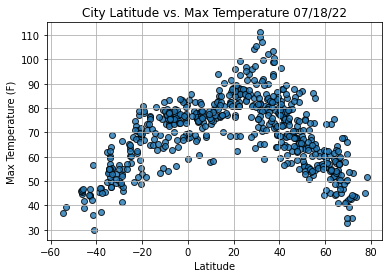

In [15]:
import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig1.png")

plt.show()

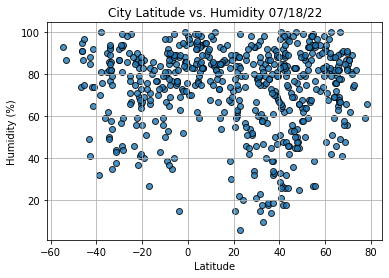

In [17]:
plt.scatter(lats,
           humidity,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig2.png")

plt.show()

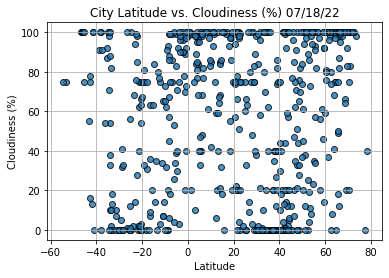

In [18]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig3.png")

plt.show()

In [ ]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig4.png")

plt.show()